# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

In [138]:
warnings.filterwarnings("ignore")

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [491]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [112]:
#Analisando as informações do DataFrame
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [80]:
#Verifica a menor informação de latitude do df
sinasc_raw['munResLat'].min()

-13.49976

In [88]:
#Verifica a maior informação de latitude do df
sinasc_raw['munResLat'].max()

-8.76889

In [90]:
#Cria faixas de acordo com as informações encontradas
latitude = pd.cut(sinasc_raw['munResLat'], [-13.5, -10.5, -8.5]) 
latitude.value_counts()

munResLat
(-10.5, -8.5]     14034
(-13.5, -10.5]    12993
Name: count, dtype: int64

In [202]:
#Agrupa com o método groupby e aplica as funções pedidas
sinasc_raw.groupby(latitude, observed=True)[['QTDFILMORT','QTDFILVIVO']].agg(
    [('Soma','sum'),
     ('Média','mean'),
     ('Mínimo',np.min),
     ('Máximo',np.max),
     ('Mediana','median'),
     ('Desvio Padrão',np.std),
     ('Variancia',np.var)])

QTDFILMORT                                                \
                     Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResLat                                                                 
(-13.5, -10.5]     3105.0  0.242521    0.0   28.0     0.0      0.599430   
(-10.5, -8.5]      3538.0  0.291770    0.0    9.0     0.0      0.627856   

                         QTDFILVIVO                                  \
               Variancia       Soma     Média Mínimo Máximo Mediana   
munResLat                                                             
(-13.5, -10.5]  0.359317    12600.0  0.980011    0.0   30.0     1.0   
(-10.5, -8.5]   0.394204    14226.0  1.129317    0.0   12.0     1.0   

                                        
               Desvio Padrão Variancia  
munResLat                               
(-13.5, -10.5]      1.138300  1.295727  
(-10.5, -8.5]       1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [163]:
#Verifica a menor informação de área do df
sinasc_raw['munResArea'].min()

459.978

In [165]:
#Verifica a maior informação de áres do df
sinasc_raw['munResArea'].max()

34096.394

In [167]:
#Cria faixas de acordo com as informações encontradas
area = pd.cut(sinasc_raw['munResArea'], [400, 3000, 35000]) 
area.value_counts()

munResArea
(3000, 35000]    21808
(400, 3000]       5219
Name: count, dtype: int64

In [169]:
#Agrupa com o método groupby e aplica as funções pedidas
sinasc_raw.groupby(area, observed=True)[['QTDFILMORT','QTDFILVIVO']].agg(
    [('Soma','sum'),
     ('Média','mean'),
     ('Mínimo',np.min),
     ('Máximo',np.max),
     ('Mediana','median'),
     ('Desvio Padrão',np.std),
     ('Variancia',np.var)])

QTDFILMORT                                                \
                    Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResArea                                                               
(400, 3000]       1260.0  0.244803    0.0    4.0     0.0      0.551215   
(3000, 35000]     5383.0  0.272116    0.0   28.0     0.0      0.629081   

                        QTDFILVIVO                                  \
              Variancia       Soma     Média Mínimo Máximo Mediana   
munResArea                                                           
(400, 3000]    0.303838     4773.0  0.924284    0.0   30.0     1.0   
(3000, 35000]  0.395743    22053.0  1.086890    0.0   14.0     1.0   

                                       
              Desvio Padrão Variancia  
munResArea                             
(400, 3000]        1.075442  1.156575  
(3000, 35000]      1.191750  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [183]:
#Verifica os valores de altitude
sinasc_raw['munResAlt'].sort_values().unique()

array([ 85.,  87.,  99., 111., 124., 128., 133., 139., 144., 145., 151.,
       153., 154., 155., 157., 158., 161., 163., 166., 170., 177., 178.,
       182., 186., 191., 192., 197., 202., 206., 212., 215., 227., 230.,
       236., 241., 245., 252., 259., 263., 265., 266., 269., 270., 296.,
       338., 340., 397., 419., 595.,  nan])

In [193]:
#Cria faixas de acordo com as informações encontradas
altitude = pd.qcut(sinasc_raw['munResAlt'], 3)
altitude.value_counts()

munResAlt
(111.0, 177.0]     9762
(84.999, 111.0]    9088
(177.0, 595.0]     8177
Name: count, dtype: int64

In [195]:
#Agrupa com o método groupby e aplica as funções pedidas
sinasc_raw.groupby(altitude, observed=True)[['QTDFILMORT','QTDFILVIVO']].agg(
    [('Soma','sum'),
     ('Média','mean'),
     ('Mínimo',np.min),
     ('Máximo',np.max),
     ('Mediana','median'),
     ('Desvio Padrão',np.std),
     ('Variancia',np.var)])

QTDFILMORT                                                \
                      Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResAlt                                                                  
(84.999, 111.0]     2357.0  0.307261    0.0    9.0     0.0      0.638486   
(111.0, 177.0]      2381.0  0.258103    0.0    9.0     0.0      0.592529   
(177.0, 595.0]      1905.0  0.237147    0.0   28.0     0.0      0.612091   

                          QTDFILVIVO                                  \
                Variancia       Soma     Média Mínimo Máximo Mediana   
munResAlt                                                              
(84.999, 111.0]  0.407664     9372.0  1.182736    0.0   12.0     1.0   
(111.0, 177.0]   0.351090     9871.0  1.043777    0.0   14.0     1.0   
(177.0, 595.0]   0.374656     7583.0  0.939304    0.0   30.0     1.0   

                                         
                Desvio Padrão Variancia  
munResAlt                                
(84.999, 111.0]      1.241780  1.542017  
(111.0, 177.0]       1.185246  1.404809  
(177.0, 595.0]       1.065046  1.134323

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [204]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [542]:
#Novo df com index com o nome dos municipios
sinasc_imediatas = sinasc_raw.set_index('munResNome')
sinasc_imediatas

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vilhena,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,1,5,2767632,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915
Chupinguaia,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,0,5,2772678,ATIVO,MUNIC,Rondônia,-12.55684,-60.90185,340.0,5126.723
Vilhena,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,1,5,2776905,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915


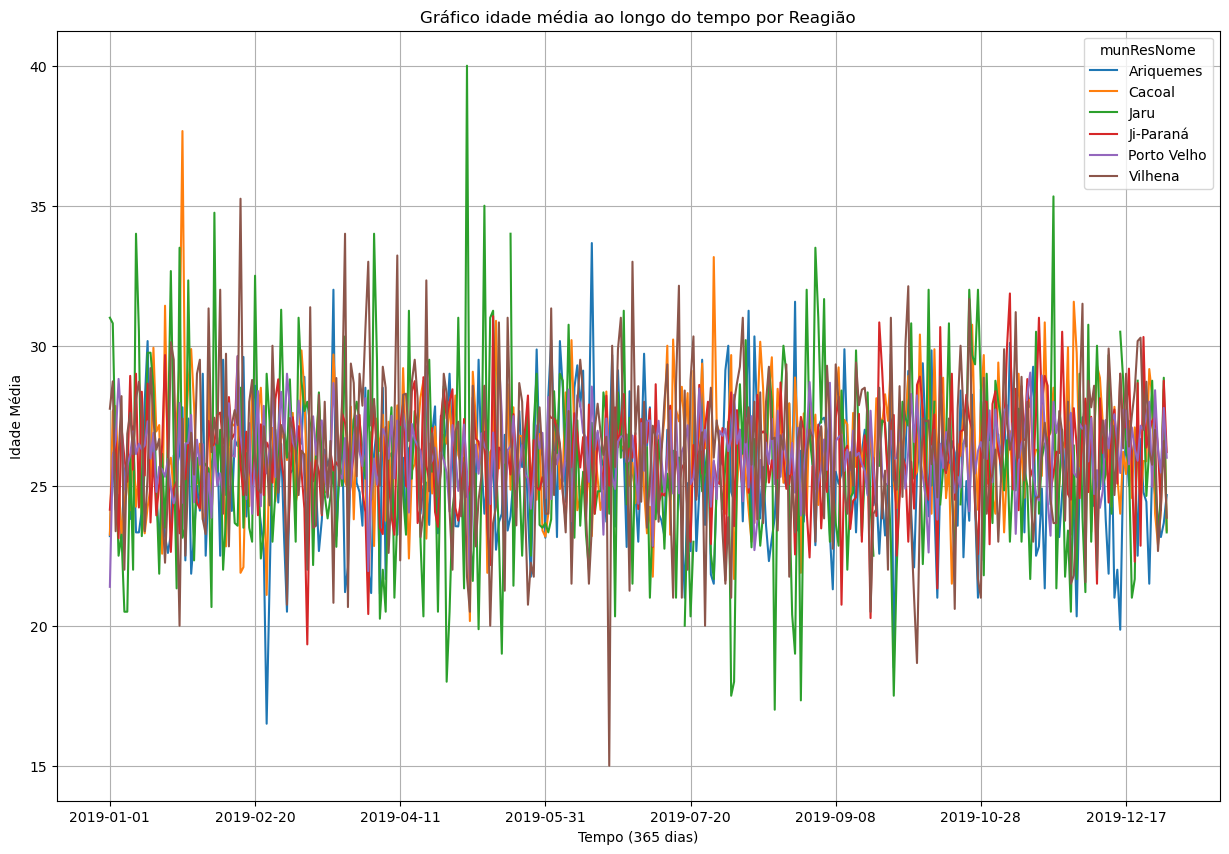

In [676]:
#Utilização do df criado acima para agrupar com Pivot Table e mostrar um 
# gráfico ao longo do tempo com a idade média das mulheres de cada regiao imediatas de rondonia

idade_media_plot = sinasc_imediatas.pivot_table(values= 'IDADEMAE',
                    index='DTNASC',
                    columns=[imediatas],
                    aggfunc='mean').plot(figsize=[15,10])
idade_media_plot.set_title('Gráfico idade média ao longo do tempo por Reagião')
idade_media_plot.set_ylabel('Idade Média')
idade_media_plot.set_xlabel('Tempo (365 dias)')
idade_media_plot.grid()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [680]:
#Aproveitando arquivo csv com as informações necessárias 
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

In [682]:
#Renomando colunas e utilizando o método merge para futura utilização
dados_ro.columns = ['munResNome', 'REGIAO', 'IDH', 'IFDM', 'PIB']
sinasc_merge = sinasc_raw.merge(dados_ro, on='munResNome', how='left')
sinasc_merge

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,REGIAO,IDH,IFDM,PIB
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal,0.641,0.6337,496000.0
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal,0.641,0.6337,496000.0
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal,0.641,0.6337,496000.0
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Cacoal,0.592,0.5046,213410.0
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal,0.641,0.6337,496000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Vilhena,0.731,0.7465,2831175.0
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,Vilhena,0.652,0.6766,190331.0
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Vilhena,0.731,0.7465,2831175.0
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Vilhena,0.731,0.7465,2831175.0


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [576]:
#Cria faixas de IDH de acordo com a classificação presente no site
idh = pd.cut(sinasc_merge['IDH'], [0.500, 0.599, 0.699, 0.799])

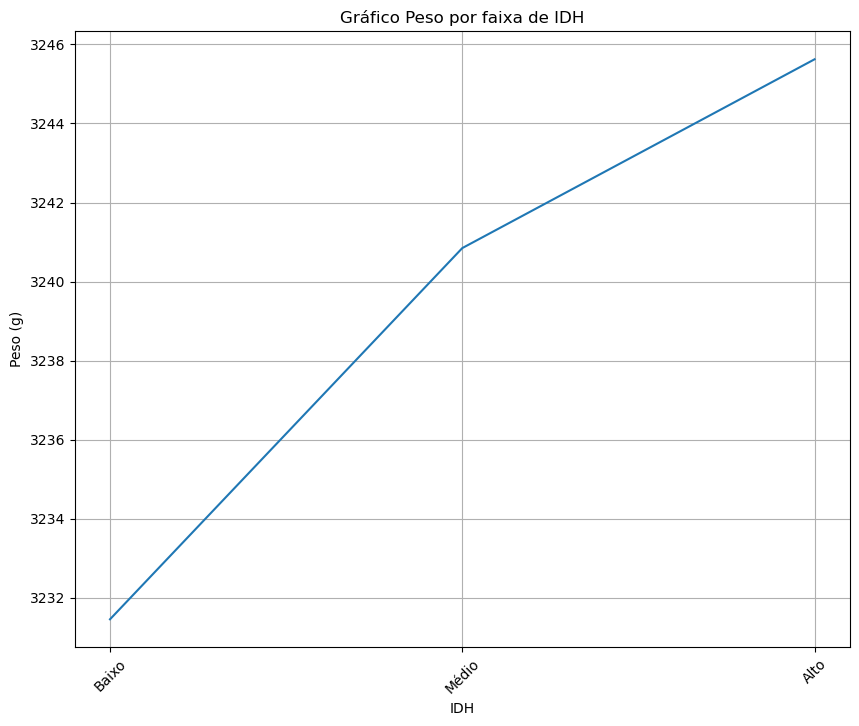

In [668]:
#Agrupameto com as faixas criadas e plotagem do gráfico para melhor vizualização 
idh_plot = sinasc_merge.groupby(idh, observed=True)['PESO'].mean().plot(figsize=[10,8])
x = ['Baixo', 'Médio', 'Alto']
idh_plot.set_xticks([0,1,2])
idh_plot.set_xticklabels(x, rotation = 45)
idh_plot.set_title('Gráfico Peso por faixa de IDH')
idh_plot.set_ylabel('Peso (g)')
idh_plot.grid()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [588]:
#Cria faixas de IFDM de acordo com a classificação presente no site
ifdm = pd.cut(sinasc_merge['IFDM'], [0.399, 0.599, 0.799])

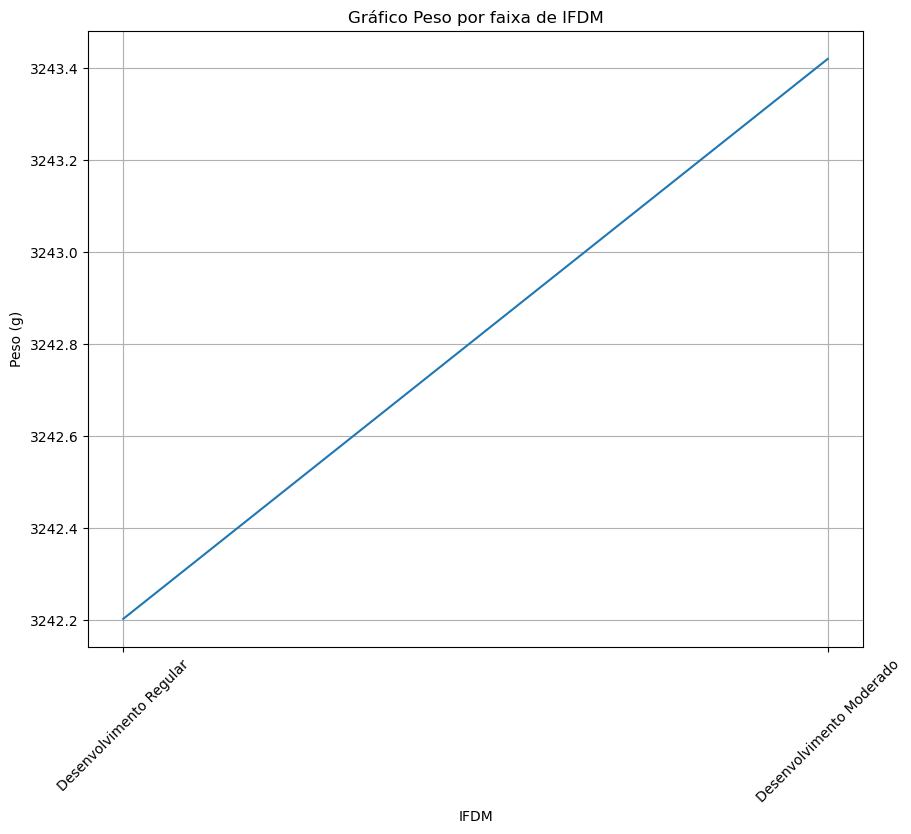

In [672]:
#Agrupameto com as faixas criadas e plotagem do gráfico para melhor vizualização
ifdm_plot = sinasc_merge.groupby(ifdm, observed=True)['PESO'].mean().plot(figsize=[10,8])
x = ['Desenvolvimento Regular', 'Desenvolvimento Moderado']
ifdm_plot.set_xticks([0,1])
ifdm_plot.set_xticklabels(x, rotation = 45)
ifdm_plot.set_title('Gráfico Peso por faixa de IFDM')
ifdm_plot.set_ylabel('Peso (g)')
ifdm_plot.grid()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [594]:
#Cria faixas de PIB de acordo com a classificação presente no site
pib = pd.cut(sinasc_merge['PIB'], [0, 99999, 199999, 299999, 499999, 999999, 18000000])

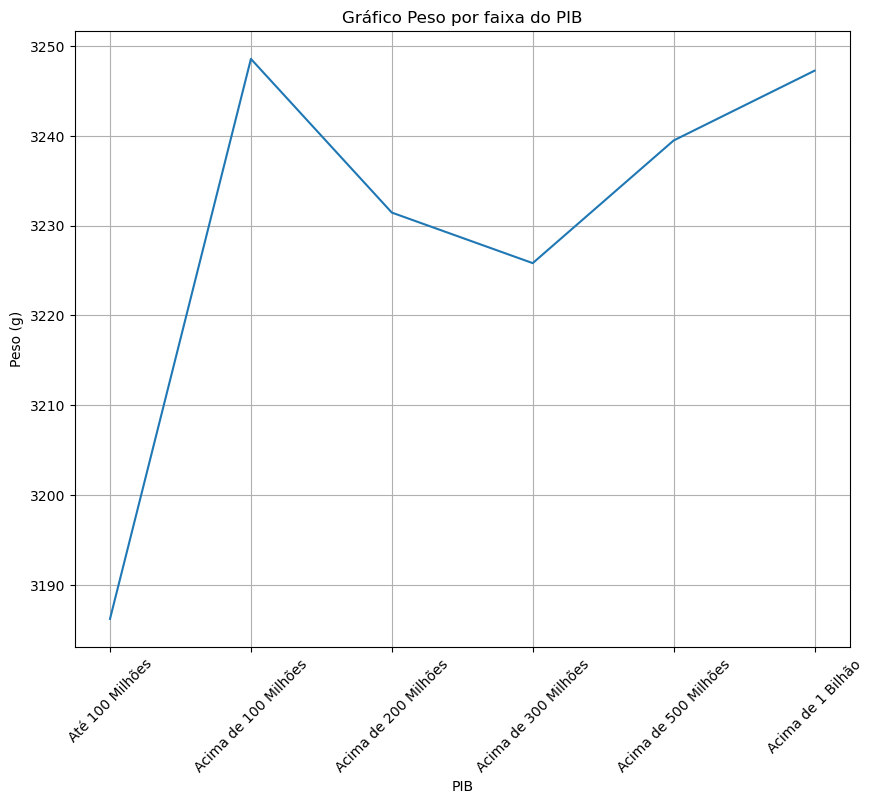

In [674]:
#Agrupameto com as faixas criadas e plotagem do gráfico para melhor vizualização
pib_plot = sinasc_merge.groupby(pib, observed=True)['PESO'].mean().plot(figsize=[10,8])
x = ['Até 100 Milhões', 'Acima de 100 Milhões', 'Acima de 200 Milhões',
     'Acima de 300 Milhões', 'Acima de 500 Milhões', 'Acima de 1 Bilhão']
pib_plot.set_xticks([0,1,2,3,4,5])
pib_plot.set_xticklabels(x, rotation = 45)
pib_plot.set_title('Gráfico Peso por faixa do PIB')
pib_plot.set_ylabel('Peso (g)')
pib_plot.grid()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

#### Insigths
- Para a Idade Média ao longo do tempo de acordo com as regiões imediatas de Rondônia, se verifica que possuem maior concentração entre 20 e 30 anos de idade. Sendo a região de Jaru a mais alta delas, com o valor de 40 anos, e a região de Vilhena a mais baixa delas, com o valor de 15 anos de idade.
- Para as informações de IDH e IFDM o peso pode ser vizualizado de uma maneira crescente e quase constante, aqueles municípios com valores de IDH e IFDM mais baixos possuem também o valor de peso da mesma maneira. Já quando comparado com o PIB percebe-se que aqueles municípios com valores de até 100 milhões possuem os valores de peso mais baixos, seguido por um crescimento acentuado até a próxima faixa mostrande que os municípios com PIB acima de 100 milhões possuem o maior valor de peso registrado.
